In [26]:
import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import cv2
from Utils import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed, IntSlider

%matplotlib inline
mlt.rcParams['figure.figsize'] = (16,8)

source_image = 'data\cat.jpg'

# Loading and visualizing an image

## 1. Loading the image as color or grayscale

In [27]:
img_color = cv2.imread(source_image,1)
print(type(img_color), img_color.dtype, img_color.shape)

w = img_color.shape[0]
h = img_color.shape[1]

img_gray = cv2.imread(source_image,0)
print(type(img_gray), img_color.dtype, img_gray.shape)

<class 'numpy.ndarray'> uint8 (333, 500, 3)
<class 'numpy.ndarray'> uint8 (333, 500)


Open CV stores the image as a numpy array with the data type uint8 (since values are between 0 and 256).

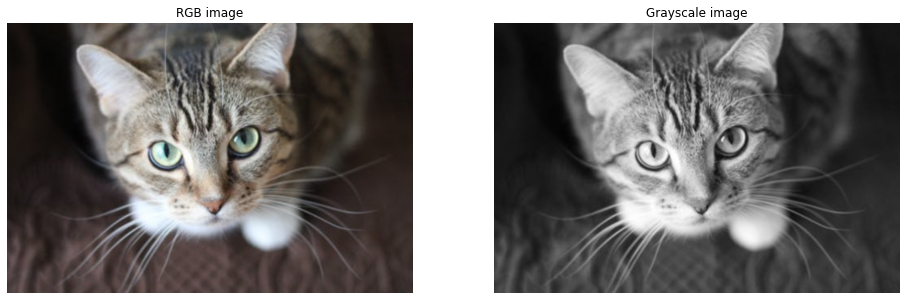

In [28]:
# In opencv the image is BGR not RGB, hence we flip the last dimension
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(np.flip(img_color,axis=2), interpolation = 'bicubic')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale image')
plt.imshow(img_gray, cmap='gray', interpolation = 'bicubic')
plt.axis('off')
plt.show()

## 2. RGB Color space

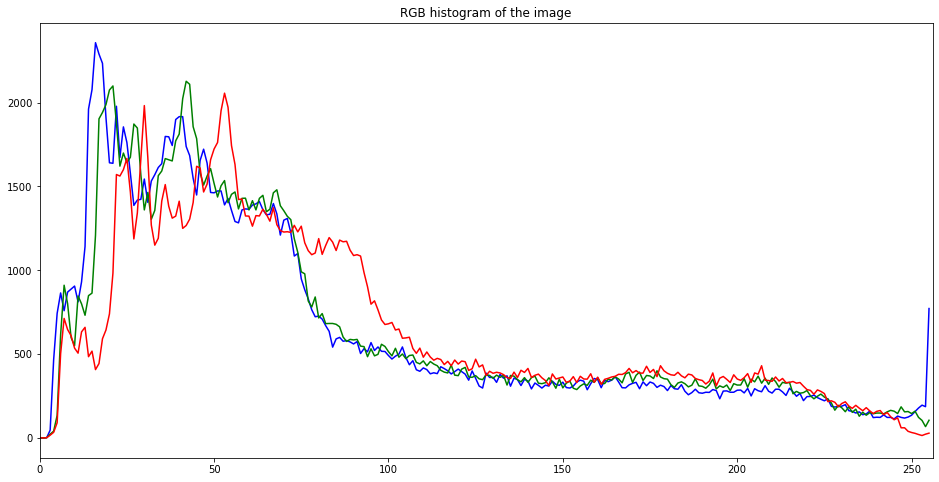

In [8]:
color_bgr = ['b','g','r']
plt.title('RGB histogram of the image')
for i,col in enumerate(color_bgr):
    histr = cv2.calcHist([img_color],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [10]:
_ = interact(shift_rgb_values, 
             input_color_rgb = fixed(np.flip(img_color,axis=2)), 
             red = (-255,255), 
             green = (-255,255), 
             blue = (-255,255))

interactive(children=(IntSlider(value=0, description='red', max=255, min=-255), IntSlider(value=0, description…

## 3. HSV Color space

In [11]:
img_color_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
print(type(img_color_hsv), img_color_hsv.dtype, img_color_hsv.shape)

<class 'numpy.ndarray'> uint8 (333, 500, 3)


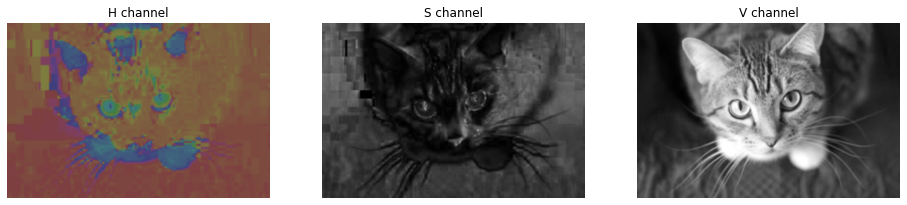

In [12]:
channel_hsv = ['h', 's', 'v']
channel_images = []

for i in range(3):
    
    # Create new RGB image by setting 2 other channels to 0
    if i==0:
        tmp = np.ones(img_color_hsv.shape, dtype=np.uint8)*125
        tmp[:, :, i] = img_color_hsv[:,:,i].copy()
        channel_image = cv2.cvtColor(tmp, cv2.COLOR_HSV2RGB)
    else:
        channel_image = img_color_hsv[:,:,i]
    
    # == Channel images ===
    plt.subplot(1,3,i+1)
    plt.title("%s channel"%(channel_hsv[i].upper()))
    if i==0:
        plt.imshow(channel_image, interpolation = 'bicubic')
    else:
        plt.imshow(channel_image, cmap='gray', interpolation = 'bicubic')
    plt.axis('off')
    
    channel_images.append(channel_image)
    
plt.show()

In [13]:
_ = interact(shift_hsv_values, 
             input_color_hsv = fixed(img_color_hsv), 
             hue = (-179,179), 
             saturation = (-255,255), 
             value = (-255,255))

interactive(children=(IntSlider(value=0, description='hue', max=179, min=-179), IntSlider(value=0, description…

# Resizing

Using pyplot imshow to display the image, we are resizing it to fit the notebook layout. To resize an image, interpolation is used and various methods exist yielding different results in terms of complexity and precision.

## 1. Downscaling an image

We can see a simple example of the interpolation effects using an initial 2x2 pixel image.


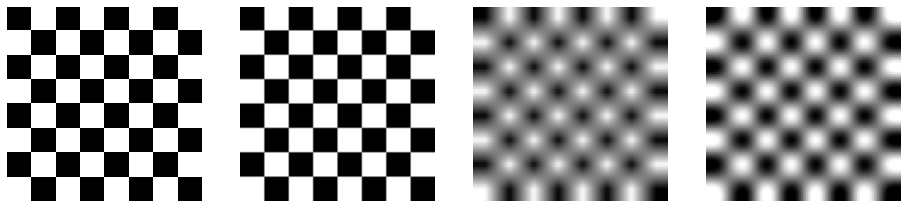

In [5]:
im = np.array([[0,255],[255,0]], dtype = np.uint8)
im = np.concatenate((im, im, im, im), axis=0)
im = np.concatenate((im, im, im, im), axis=1)

plt.subplot(1, 4, 1)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.imshow(resize_image(im, 10, cv2.INTER_NEAREST), cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(resize_image(im, 10, cv2.INTER_LINEAR), cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.imshow(resize_image(im, 10, cv2.INTER_CUBIC), cmap='gray')

plt.show()

## 2. Upscaling an image

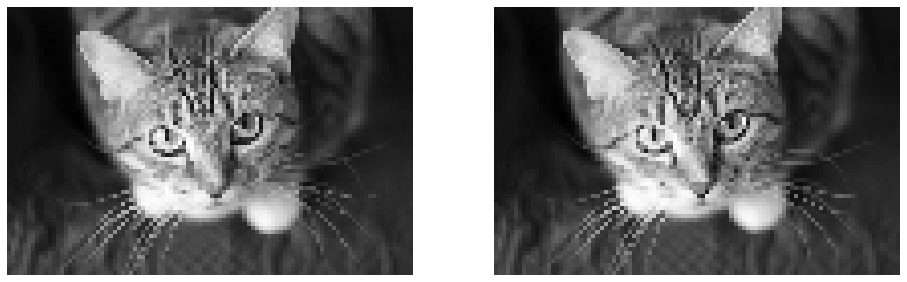

In [6]:
plot_2_gray_images(resize_image(img_gray, 0.2, cv2.INTER_NEAREST), 
                   resize_image(img_gray, 0.2, cv2.INTER_CUBIC))

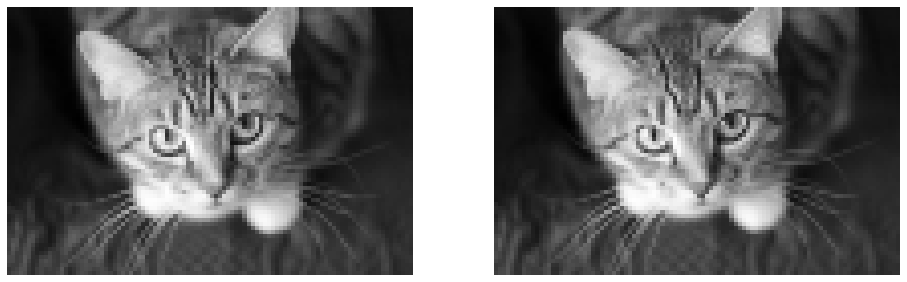

In [7]:
plot_2_gray_images(resize_image(cv2.GaussianBlur(img_gray,(7,7),0), 0.2, cv2.INTER_NEAREST), 
                   resize_image(cv2.GaussianBlur(img_gray,(7,7),0), 0.2, cv2.INTER_CUBIC))